<a href="https://colab.research.google.com/github/PratyushSingh1/Data_Science_Projects/blob/main/Flipkart_Sentimental_Analysis_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flipkart Product Review Sentiment Analysis
Flipkart is one of the most popular Indian companies. It is an e-commerce platform that competes with popular e-commerce platforms like Amazon. One of the most popular use cases of data science is the task of sentiment analysis of product reviews sold on e-commerce platforms. So for today our product is mentioned as below: 
### **Product Name** : boAt Rockerz 255 Bluetooth Wireless in Ear Earphones with Mic (Active Black)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### Sample Dataset of the boAt Rockerz 365

In [ ]:
data = pd.read_csv("Reviews.csv")
data.head()

,ID,ProfileName,Date,Review,Rating,Helpful,Colour
0,R3TXG6YE9G2JU0,nandani,21-12-20,Sound quality More than expected awesome speaker,5,80,Blue
1,R12YVPWWVBD0FI,Salman khan,27-12-20,A good speaker to play your music Playlist wit...,5,78,Black
2,R2LI96EMJPM7I9,Kuldeep Singh,05-03-21,Waterproof,5,49,Black
3,R13DXHTESIF6V2,Alex,07-10-21,Paisa Wasul !!,5,16,Red
4,R2ZYV24XX6J5EW,Aniket,10-10-21,Just go for it its pocket rocket speaker 🔊 doe...,5,5,Red


### Dimensions of the dataset

In [ ]:
data.shape

(1000, 7)

### Field Attributes in the dataset

In [ ]:
data.columns

Index(['ID', 'ProfileName', 'Date', 'Review', 'Rating', 'Helpful', 'Colour'], dtype='object')

### Descriptive Information of entire dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           1000 non-null   object
 1   ProfileName  1000 non-null   object
 2   Date         1000 non-null   object
 3   Review       1000 non-null   object
 4   Rating       1000 non-null   int64 
 5   Helpful      1000 non-null   int64 
 6   Colour       1000 non-null   object
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


### Unique Identities of attributes in the dataset

In [ ]:
data.nunique()

ID             1000
ProfileName     934
Date            302
Review          787
Rating            5
Helpful          15
Colour            3
dtype: int64

### Getting frquency of individual unique records

In [ ]:
print("Frequency of Unique Colours")
print(data['Colour'].value_counts())
print("\nFrequency of Unique Ratings")
print(data['Rating'].value_counts())
print("\nFrequency of Helpful Comments")
data['Helpful'].value_counts()

Frequency of Unique Colours
Black    429
Blue     351
Red      220
Name: Colour, dtype: int64

Frequency of Unique Ratings
5    404
1    221
4    198
3    104
2     73
Name: Rating, dtype: int64

Frequency of Helpful Comments


0      928
1       44
5        5
3        5
2        4
4        3
15       2
12       2
80       1
78       1
49       1
16       1
124      1
21       1
6        1
Name: Helpful, dtype: int64

### Checking null values in the dataset

In [ ]:
data.isnull().sum()

id             0
profileName    0
date           0
reviews        0
rating         0
helpful        0
Colour         0
dtype: int64

### Descriptive information for Numerical attributes of the dataset

In [ ]:
data.describe()

,rating,helpful
count,1000.000000,1000.000000
mean,3.491000,0.532000
std,1.591368,5.635489
min,1.000000,0.000000
25%,2.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,0.000000
max,5.000000,124.000000


### Most favourite choice in terms of colour of this product

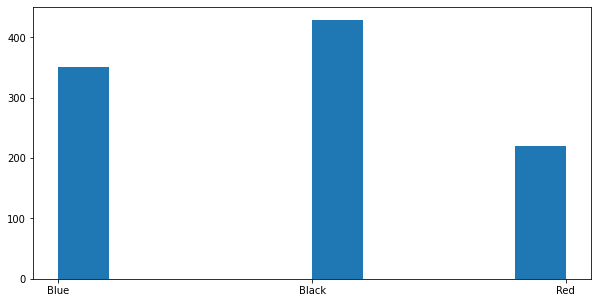

In [ ]:
fig, axis = plt.subplots(figsize =(10, 5))
axis.hist(data['Colour'])
# Displaying the graph
plt.show()

### Number of users who rated 5 stars for this product

In [ ]:
rate = (data.loc[(data['rating'] == 5)])
print("Number of People rated 5-stars - ", len(rate))
print(rate['profileName'].head())

Number of People rated 5-stars -  404
1           nandani
2       Salman khan
3     Kuldeep Singh
13           Aniket
15           ashpra
Name: profileName, dtype: object


### Reviews that found most helpful for other customers to purchase according to rating

In [ ]:
new_data = data.sort_values(by=['helpful', 'rating'], ascending=[False, False])
new_data[['profileName', 'reviews','rating', 'Colour', 'helpful']].head()

,profileName,reviews,rating,Colour,helpful
0,Suman,perform specifi,1,Blue,124
1,nandani,sound qualiti expect awesom speaker,5,Blue,80
2,Salman khan,good speaker play music playlist good voic cla...,5,Black,78
3,Kuldeep Singh,waterproof,5,Black,49
4,Perspicacious,receiv tamper refurbish secondhand nonfunct sm...,1,Black,21


### Imported necessary libraries for extracting sentiment scores 

In [ ]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Cleaning the attribute records that contains special characters

In [ ]:
def data_cleaning(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

data["reviews"] = data["reviews"].apply(data_cleaning)

### Overall distribution of ratings

In [ ]:
ratings = data['rating'].value_counts()
numbers = ratings.index
amount = ratings.values

figure = px.pie(data, title="Pie Chart representing percentage divide in ratings of this product",  values=amount,names=numbers,hole = 0.5)
figure.show()

## Implementing word cloud from cleaned dataset

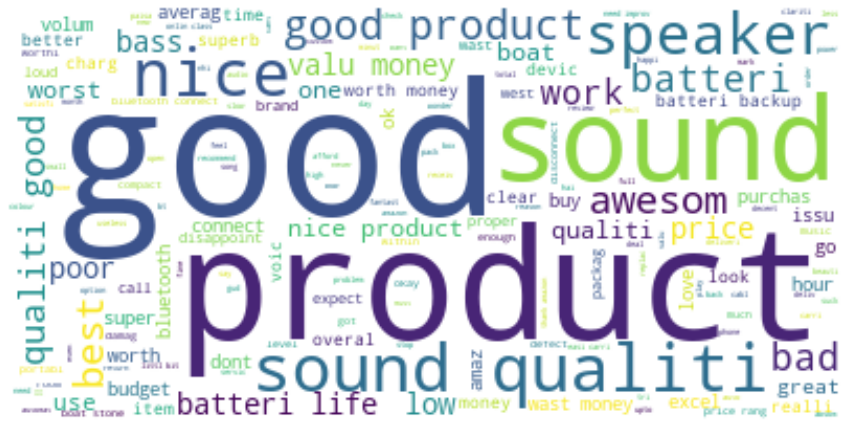

In [ ]:
text = " ".join(i for i in data.reviews)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Calculated appropriate sentiment scores of the reviews extracted

In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["reviews"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["reviews"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["reviews"]]
data1 = data[["reviews", "Positive", "Negative", "Neutral"]]
print(data1.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
                                             reviews  Positive  Negative  \
0                                    perform specifi     0.000       0.0   
1                sound qualiti expect awesom speaker     0.000       0.0   
2  good speaker play music playlist good voic cla...     0.621       0.0   
3                                         waterproof     0.000       0.0   
4  receiv tamper refurbish secondhand nonfunct sm...     0.000       0.0   

   Neutral  
0    1.000  
1    1.000  
2    0.379  
3    1.000  
4    1.000  


### Summing up the sentiment scores and declaring the result

In [ ]:
x = sum(data1["Positive"])
y = sum(data1["Negative"])
z = sum(data1["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
print("Overall sentiments of reviews on Flipkart for bOAT speakers were:")
sentiment_score(x, y, z)

Overall sentiments of reviews on Flipkart for laptops were:
Neutral 🙂 
